In [1]:
import matplotlib
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../data/covid19/covid19mexico.csv.gz",index_col=0)

C:\Users\Meenakshi\AppData\Local\Temp\ipykernel_17696\592813028.py:1: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../../data/covid19/covid19mexico.csv.gz",index_col=0)


In [3]:
# Spanish Columns Name -> English
tr_cols = """FECHA_ACTUALIZACION -> DATE_UPDATES;\
ID_REGISTRO -> REGISTRATION_ID;\
ORIGEN -> ORIGIN;\
SECTOR -> SECTOR;\
ENTIDAD_UM -> ENTITY_ONE;\
SEXO -> SEX;\
ENTIDAD_NAC -> ENTITY_NAC;\
ENTIDAD_RES -> ENTITY_RES;\
MUNICIPIO_RES -> MUNICIPAL_RES;\
TIPO_PACIENTE -> PATIENT_TYPE;\
FECHA_INGRESO -> ADMISSION DATE;\
FECHA_SINTOMAS -> CLOSE_SYMPTOMS;\
FECHA_DEF -> CLOSE_DEF;\
INTUBADO -> INTUBATED;\
NEUMONIA -> PNEUMONIA;\
EDAD -> AGE;\
NACIONALIDAD -> NATIONALITY;\
EMBARAZO -> PREGNANCY;\
HABLA_LENGUA_INDIG -> SPEAK_INDIG_LANGUAGE;\
INDIGENA -> INDIGENOUS;\
DIABETES -> DIABETES;\
EPOC -> COPD;\
ASMA -> ASMA;\
INMUSUPR -> INMUNE_SUPRESSED;\
HIPERTENSION -> HYPERTENSION;\
OTRA_COM -> OTHER_COM;\
CARDIOVASCULAR -> CARDIOVASCULAR;\
OBESIDAD -> OBESITY;\
RENAL_CRONICA -> CRONIC RENALS;\
TABAQUISMO -> SMOKING;\
OTRO_CASO -> ANOTHER CASE;\
TOMA_MUESTRA_LAB -> TAKE_SAMPLE_LAB;\
RESULTADO_LAB -> RESULT_LAB;\
TOMA_MUESTRA_ANTIGENO -> TAKE_SAMPLE_ANTIGEN;\
RESULTADO_ANTIGENO -> ANTIGEN_RESULT;\
CLASIFICACION_FINAL -> FINAL_CLASSIFICATION;\
MIGRANTE -> MIGRANT;\
PAIS_NACIONALIDAD -> COUNTRY_NATIONALITY;\
PAIS_ORIGEN -> PAIS_ORIGEN;\
UCI -> UCI"""

tr_pairs = tr_cols.split(';')

eng_cols,sp_cols = [],[]
for cols in tr_pairs:
    eng_name = cols.split(' ')
    eng = eng_name[-1]
    sp = eng_name[0]
    sp_cols.append(sp)
    eng_cols.append(eng)
df.columns = eng_cols

In [4]:
df.head()

,DATE_UPDATES,REGISTRATION_ID,ORIGIN,SECTOR,ENTITY_ONE,SEX,ENTITY_NAC,ENTITY_RES,MUNICIPAL_RES,PATIENT_TYPE,...,CASE,TAKE_SAMPLE_LAB,RESULT_LAB,TAKE_SAMPLE_ANTIGEN,ANTIGEN_RESULT,FINAL_CLASSIFICATION,MIGRANT,COUNTRY_NATIONALITY,PAIS_ORIGEN,UCI
0,2023-07-18,0ed066,2,12,16,2,16,16,41,1,...,2,2,97,1,2,7,99,México,97,97
1,2023-07-18,9edc59,2,12,7,1,7,7,108,1,...,2,2,97,2,97,6,99,México,97,97
2,2023-07-18,72b451,1,12,22,1,22,22,6,1,...,2,1,2,1,2,7,99,México,97,97
3,2023-07-18,dd7e13,2,6,16,2,16,16,112,1,...,2,2,97,1,1,3,99,México,97,97
4,2023-07-18,62dc8d,2,12,7,2,7,7,64,1,...,2,2,97,2,97,6,99,México,97,97


In [5]:
print(df.REGISTRATION_ID.nunique())
print(df.shape)

985570
(985570, 40)


In [6]:
# Drop columns that are not to influence the model
# Dropping column names:
# DATE_UPDATES, REGISTRATION_ID,ENTITY_NAC,ENTITY_RES,MUNICIPAL_RES,
# ORIGEN,SECTOR,ENTITY_ONE,DATE,CLOSE_SYMPTOMS,CLOSE_DEF,NATIONALITY,
# SPEAK_INDIG_LANGUAGE,INDIGENOUS,CASE,TAKE_SAMPLE_LAB,RESULT_LAB,
# TAKE_SAMPLE_ANTIGEN,ANTIGEN_RESULT,MIGRANT,COUNTRY_NATIONALITY,PAIS_ORIGEN,PATIENT_TYPE

In [7]:
new_df = df.drop(['DATE_UPDATES', 'REGISTRATION_ID','ENTITY_NAC','ENTITY_RES','MUNICIPAL_RES',
'ORIGIN','SECTOR','ENTITY_ONE','DATE','CLOSE_SYMPTOMS','CLOSE_DEF','NATIONALITY',
'SPEAK_INDIG_LANGUAGE','INDIGENOUS','CASE','TAKE_SAMPLE_LAB','RESULT_LAB','INTUBATED',
'TAKE_SAMPLE_ANTIGEN','ANTIGEN_RESULT','MIGRANT','COUNTRY_NATIONALITY','PAIS_ORIGEN','PATIENT_TYPE','UCI'],axis=1)

In [8]:
# Change the Data types to INT
new_df[['PNEUMONIA']] = df[['PNEUMONIA']].apply(pd.to_numeric)
new_df[['PREGNANCY']] = df[['PREGNANCY']].apply(pd.to_numeric) 
new_df[['DIABETES']] = df[['DIABETES']].apply(pd.to_numeric)
new_df[['COPD']] = df[['COPD']].apply(pd.to_numeric)
new_df[['ASMA']] = df[['ASMA']].apply(pd.to_numeric)
new_df[['INMUNE_SUPRESSED']] = df[['INMUNE_SUPRESSED']].apply(pd.to_numeric) 
new_df[['HYPERTENSION']] = df[['HYPERTENSION']].apply(pd.to_numeric)
new_df[['OTHER_COM']] = df[['OTHER_COM']].apply(pd.to_numeric) 
new_df[['CARDIOVASCULAR']] = df[['CARDIOVASCULAR']].apply(pd.to_numeric)
new_df[['OBESITY']] = df[['OBESITY']].apply(pd.to_numeric) 
new_df[['RENALS']] = df[['RENALS']].apply(pd.to_numeric)
new_df[['SMOKING']] = df[['SMOKING']].apply(pd.to_numeric)

In [9]:
# Convert SEX to proper numeric: Here 2 -> Male, 1 -> Female. We change 0 -> Female and 1 -> Male
# No missing entries for SEX
fem = list((new_df.loc[new_df['SEX'] == 1]).index)
new_df.loc[fem,["SEX"]] = 0 
male = list((new_df.loc[new_df['SEX'] == 2]).index)
new_df.loc[male,["SEX"]] = 1 

In [10]:
# Convert PNEUMONIA	to proper numeric: Here 2 -> NO, 1 -> YES, 99 -> "Missing". 
# We change 2 -> 0(NO), None -> "Missing"
# 5148 Missing Records For Pneumonia
nopne = list((new_df.loc[new_df['PNEUMONIA'] == 2]).index)
new_df.loc[nopne,["PNEUMONIA"]] = 0 
miss = list((new_df.loc[new_df['PNEUMONIA'] == 99]).index)
new_df.loc[miss,["PNEUMONIA"]] = np.nan

In [11]:
# Convert PREGNANCY	to proper numeric: Here 2 -> NO, 1 -> YES. 97,98,99 -> "Missing". 
# We change 0 -> No and None -> "Missing"
nopre = list((new_df.loc[new_df['PREGNANCY'] == 2]).index)
new_df.loc[nopre,["PREGNANCY"]] = 0 
miss = list((new_df.loc[(new_df['PREGNANCY'] == 99) | (new_df['PREGNANCY'] == 98) | (new_df['PREGNANCY'] == 97)]).index)
new_df.loc[miss,["PREGNANCY"]] = np.nan 

In [12]:
# Convert DIABETES	to proper numeric: Here 2 -> NO, 1 -> YES. 98 -> "Missing". 
# We change 0 -> No and None -> "Missing"
nodie = list((new_df.loc[new_df['DIABETES'] == 2]).index)
new_df.loc[nodie,["DIABETES"]] = 0 
miss = list((new_df.loc[(new_df['DIABETES'] == 98)]).index)
new_df.loc[miss,["DIABETES"]] = np.nan 

In [13]:
# Convert COPD to proper numeric: Here 2 -> NO, 1 -> YES. 98 -> "Missing". 
# We change 0 -> No and None -> "Missing"
nocopd = list((new_df.loc[new_df['COPD'] == 2]).index)
new_df.loc[nocopd,["COPD"]] = 0 
miss = list((new_df.loc[(new_df['COPD'] == 98)]).index)
new_df.loc[miss,["COPD"]] = np.nan 

In [14]:
# Convert ASMA to proper numeric: Here 2 -> NO, 1 -> YES. 98 -> "Missing". 
# We change 0 -> No and None -> "Missing"
noasma = list((new_df.loc[new_df['ASMA'] == 2]).index)
new_df.loc[noasma,["ASMA"]] = 0 
miss = list((new_df.loc[(new_df['ASMA'] == 98)]).index)
new_df.loc[miss,["ASMA"]] = np.nan 

In [15]:
# Convert INMUSUPR to proper numeric: Here 2 -> NO, 1 -> YES. 98 -> "Missing". 
# We change 0 -> No and None -> "Missing"
noimm = list((new_df.loc[new_df['INMUNE_SUPRESSED'] == 2]).index)
new_df.loc[noimm,["INMUNE_SUPRESSED"]] = 0 
miss = list((new_df.loc[(new_df['INMUNE_SUPRESSED'] == 98)]).index)
new_df.loc[miss,["INMUNE_SUPRESSED"]] = np.nan 

In [16]:
# Convert HYPERTENSION to proper numeric: Here 2 -> NO, 1 -> YES. 98 -> "Missing". 
# We change 0 -> No and None -> "Missing"
nohy = list((new_df.loc[new_df['HYPERTENSION'] == 2]).index)
new_df.loc[nohy,["HYPERTENSION"]] = 0 
miss = list((new_df.loc[(new_df['HYPERTENSION'] == 98)]).index)
new_df.loc[miss,["HYPERTENSION"]] = np.nan 

In [17]:
# Convert OTHER_COM to proper numeric: Here 2 -> NO, 1 -> YES. 98 -> "Missing". 
# We change 0 -> No and None -> "Missing"
no = list((new_df.loc[new_df['OTHER_COM'] == 2]).index)
new_df.loc[no,["OTHER_COM"]] = 0 
miss = list((new_df.loc[(new_df['OTHER_COM'] == 98)]).index)
new_df.loc[miss,["OTHER_COM"]] = np.nan 

In [18]:
# Convert CARDIOVASCULAR to proper numeric: Here 2 -> NO, 1 -> YES. 98 -> "Missing". 
# We change 0 -> No and None -> "Missing"
nocar = list((new_df.loc[new_df['CARDIOVASCULAR'] == 2]).index)
new_df.loc[nocar,["CARDIOVASCULAR"]] = 0 
miss = list((new_df.loc[(new_df['CARDIOVASCULAR'] == 98)]).index)
new_df.loc[miss,["CARDIOVASCULAR"]] = np.nan 

In [19]:
# Convert OBESITY to proper numeric: Here 2 -> NO, 1 -> YES. 98 -> "Missing". 
# We change 0 -> No and None -> "Missing"
noobe = list((new_df.loc[new_df['OBESITY'] == 2]).index)
new_df.loc[noobe,["OBESITY"]] = 0 
miss = list((new_df.loc[(new_df['OBESITY'] == 98)]).index)
new_df.loc[miss,["OBESITY"]] = np.nan 

In [20]:
# Convert RENALS to proper numeric: Here 2 -> NO, 1 -> YES. 98 -> "Missing". 
# We change 0 -> No and None -> "Missing"
norene = list((new_df.loc[new_df['RENALS'] == 2]).index)
new_df.loc[norene,["RENALS"]] = 0 
miss = list((new_df.loc[(new_df['RENALS'] == 98)]).index)
new_df.loc[miss,["RENALS"]] = np.nan 

In [21]:
# Convert SMOKING to proper numeric: Here 2 -> NO, 1 -> YES. 98 -> "Missing". 
# We change 0 -> No and None -> "Missing"
nosmo = list((new_df.loc[new_df['SMOKING'] == 2]).index)
new_df.loc[nosmo,["SMOKING"]] = 0 
miss = list((new_df.loc[(new_df['SMOKING'] == 98)]).index)
new_df.loc[miss,["SMOKING"]] = np.nan 

In [22]:
# Convert FINAL_CLASSIFICATION to proper numeric: Here Values 1-3 mean that the patient was
# diagnosed with covid in different degrees. 
# 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
# We change 1-3 -> 1 rest all 0. 
yescov = list((new_df.loc[(new_df['FINAL_CLASSIFICATION']<4)]).index)
new_df.loc[yescov,["FINAL_CLASSIFICATION"]] = 1 
nocov = list((new_df.loc[new_df['FINAL_CLASSIFICATION']>=4]).index)
new_df.loc[nocov,["FINAL_CLASSIFICATION"]] = 0 

In [23]:
new_df["FINAL_CLASSIFICATION"].value_counts()

0    627501
1    358069
Name: FINAL_CLASSIFICATION, dtype: int64

In [24]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985570 entries, 0 to 985569
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   SEX                   985570 non-null  int64  
 1   PNEUMONIA             980422 non-null  float64
 2   AGE                   985570 non-null  int64  
 3   PREGNANCY             572920 non-null  float64
 4   DIABETES              984625 non-null  float64
 5   COPD                  984709 non-null  float64
 6   ASMA                  984750 non-null  float64
 7   INMUNE_SUPRESSED      984777 non-null  float64
 8   HYPERTENSION          984727 non-null  float64
 9   OTHER_COM             978704 non-null  float64
 10  CARDIOVASCULAR        984743 non-null  float64
 11  OBESITY               984810 non-null  float64
 12  RENALS                984742 non-null  float64
 13  SMOKING               984695 non-null  float64
 14  FINAL_CLASSIFICATION  985570 non-null  int64  
dtype

In [25]:
from mlxtend.evaluate import bias_variance_decomp

from sklearn.experimental import enable_iterative_imputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import IterativeImputer
from sklearn import metrics

In [26]:
TRAIN_FRACTION = 0.5
RANDOM_SEED = 56732

new_cols = new_df.columns
train_df = new_df.sample(frac=TRAIN_FRACTION,random_state=RANDOM_SEED)

In [27]:
imp = IterativeImputer(max_iter=10, random_state=RANDOM_SEED) 
imp.fit(train_df[new_cols[:-1]])
train_x_df = imp.transform(train_df[new_cols[:-1]])
train_y_df = train_df[new_cols[-1]]

In [28]:
test_df = new_df.drop(index=train_df.index)
test_x_df = imp.transform(test_df[new_cols[:-1]])
test_y_df = test_df[new_cols[-1]]

max_depth=100
criterion='entropy'
min_samples_split=0.05
min_samples_leaf=0.01
max_features=10
records=[]
for depth in range(1,max_depth,5):
    rfc=RandomForestClassifier(criterion=criterion,max_depth=depth,max_features=max_features,random_state=RANDOM_SEED)
    rfc.fit(train_x_df,train_y_df)
    predict_test_y=rfc.predict(test_x_df)
    predict_test_proba = rfc.predict_proba(test_x_df)
    bias = 1- metrics.accuracy_score(predict_test_y,test_y_df.values)
    variance = np.mean(1 -  predict_test_proba[:,0])
    print("depth = ", depth," bias = ",bias," variance = ",variance)
    records.append([depth,bias,variance])
dbv=pd.DataFrame.from_records(records,columns=['Depth','Bias2','Variance'])
    

In [34]:

max_depth=100
criterion='entropy'
records=[]
for depth in range(1,max_depth+1):

    tree = DecisionTreeClassifier(random_state=RANDOM_SEED,criterion=criterion,max_depth=depth)

    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
            tree,train_x_df, train_y_df.values, test_x_df, test_y_df.values, 
            loss='0-1_loss',
            random_seed=RANDOM_SEED,num_rounds=50)

    print('Average expected loss: %.3f' % avg_expected_loss)
    print('Average bias: %.3f' % avg_bias)
    print('Average variance: %.3f' % avg_var)
    records.append([depth,avg_expected_loss,avg_bias,avg_var])

dbv=pd.DataFrame.from_records(records,columns=['Depth','Loss','BIAS','VARIANCE'])
dbv.to_csv('DepthBiasVariance.csv',index=False)
    

Average expected loss: 0.363
Average bias: 0.363
Average variance: 0.000
Average expected loss: 0.363
Average bias: 0.363
Average variance: 0.000
Average expected loss: 0.363
Average bias: 0.363
Average variance: 0.000
Average expected loss: 0.363
Average bias: 0.363
Average variance: 0.012
Average expected loss: 0.362
Average bias: 0.361
Average variance: 0.013
Average expected loss: 0.361
Average bias: 0.361
Average variance: 0.007
Average expected loss: 0.361
Average bias: 0.360
Average variance: 0.011
Average expected loss: 0.361
Average bias: 0.360
Average variance: 0.011
Average expected loss: 0.361
Average bias: 0.360
Average variance: 0.011
Average expected loss: 0.361
Average bias: 0.360
Average variance: 0.013
Average expected loss: 0.361
Average bias: 0.360
Average variance: 0.016
Average expected loss: 0.362
Average bias: 0.360
Average variance: 0.021
Average expected loss: 0.362
Average bias: 0.360
Average variance: 0.025
Average expected loss: 0.362
Average bias: 0.360
Av

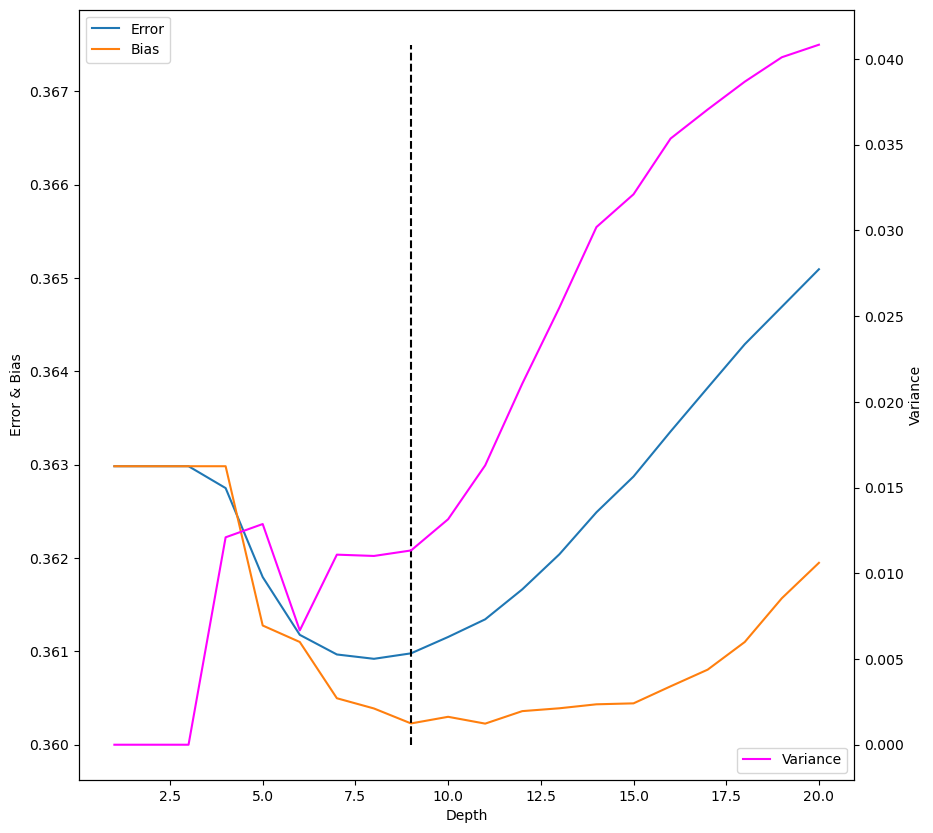

In [75]:
max_depth=20
fig,ax1=plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
ax1.set_ylabel('Error & Bias') 
ax1.set_xlabel('Depth') 
ax1.plot(dbv.iloc[:max_depth,0],dbv.iloc[:max_depth,1])
ax1.plot(dbv.iloc[:max_depth,0],dbv.iloc[:max_depth,2])

ax2=ax1.twinx()
ax2.plot(dbv.iloc[:max_depth,0],dbv.iloc[:max_depth,3],color='magenta')
ax2.set_ylabel('Variance') 
ax1.vlines(x=9,ymin=0.360,ymax=0.3675,colors='k',linestyles='dashed')
ax1.legend(['Error','Bias'],loc='upper left')
ax2.legend(['Variance'],loc='lower right')
plt.show()